Dado que el entrenamiento de redes neuronales es una tarea  muy costosa, **se recomienda ejecutar el notebooks en [Google Colab](https://colab.research.google.com)**, por supuesto también se puede ejecutar en local.

Al entrar en [Google Colab](https://colab.research.google.com) bastará con hacer click en `upload` y subir este notebook. No olvide luego descargarlo en `File->Download .ipynb`

**El examen deberá ser entregado con las celdas ejecutadas, si alguna celda no está ejecutadas no se contará.**

El examen se divide en dos partes, con la puntuación que se indica a continuación. La puntuación máxima será 10.

- [Actividad 1: Redes Densas](#actividad_1): 5 pts
    - Correcta normalización: máximo de 0.25 pts
    - [Cuestión 1](#1.1): 1.5 pt
    - [Cuestión 2](#1.2): 1.5 pt
    - [Cuestión 3](#1.3): 0.5 pts
    - [Cuestión 4](#1.4): 0.25 pts
    - [Cuestión 5](#1.5): 0.25 pts
    - [Cuestión 6](#1.6): 0.25 pts
    - [Cuestión 7](#1.7): 0.25 pts
    - [Cuestión 8](#1.8): 0.25 pts


- [Actividad 2: Redes Convolucionales](#actividad_2): 5 pts
    - [Cuestión 1](#2.1): 2.5 pt
    - [Cuestión 2](#2.2): 1 pt
    - [Cuestión 3](#2.3): 0.5 pts
    - [Cuestión 4](#2.4): 0.5 pts
    - [Cuestión 5](#2.5): 0.5 pts
    

In [12]:
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
tf.random.set_seed(0)

<a name='actividad_1'></a>
# Actividad 1: Redes Densas

Para esta primera actividad vamos a utilizar el [wine quality dataset](https://archive.ics.uci.edu/ml/datasets/wine+quality). Con el que trataremos de predecir la calidad del vino.

La calidad del vino puede tomar valores decimales (por ejemplo 7.25), independientemente de que en el dataset de entrenamiento sean números enteros. Por lo tanto, el problema es una `regresión`.

**Puntuación**: 

Normalizar las features correctamente (x_train, x_test): 0.25 pts , se pueden normalizar con el [Normalization layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/Normalization) de Keras. 


- Correcta normalización: máximo de 0.25 pts
- [Cuestión 1](#1.1): 1 pt
- [Cuestión 2](#1.2): 1 pt
- [Cuestión 3](#1.3): 0.5 pts
- [Cuestión 4](#1.4): 0.25 pts
- [Cuestión 5](#1.5): 0.25 pts
- [Cuestión 6](#1.6): 0.25 pts
- [Cuestión 7](#1.7): 0.25 pts
- [Cuestión 8](#1.8): 0.25 pts



In [13]:
# Descargar los datos con pandas
df_red = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
    sep=';'
)
df_white = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
    sep=';'
)
df = pd.concat([df_red, df_white])

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
feature_names = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
]


# separar features y target
y = df.pop('quality').values
X = df.copy().values

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print('x_train, y_train shapes:', x_train.shape, y_train.shape)
print('x_test, y_test shapes:', x_test.shape, y_test.shape)
print('Some qualities: ', y_train[:5])

x_train, y_train shapes: (4872, 11) (4872,)
x_test, y_test shapes: (1625, 11) (1625,)
Some qualities:  [6 7 8 5 6]


<a name='1.1'></a>
## Cuestión 1: Cree un modelo secuencial que contenga 4 capas ocultas(hidden layers), con más de 60 neuronas  por capa, sin regularización y obtenga los resultados.

Puntuación: 
- Obtener el modelo correcto: 0.8 pts
- Compilar el modelo: 0.1pts
- Acertar con la función de pérdida: 0.1 pts

In [16]:
model = keras.models.Sequential()

# Capa de normalización
model.add(keras.layers.Normalization(input_shape=(11,)))

# Luego añadir las capas densas
model.add(keras.layers.Dense(80, activation='relu'))
model.add(keras.layers.Dense(70, activation='relu'))
model.add(keras.layers.Dense(70, activation='relu'))
model.add(keras.layers.Dense(65, activation='relu'))
model.add(keras.layers.Dense(1, activation='linear'))

model.layers[0].adapt(x_train)

/Users/sebastian/Documents/Master/Tarea ML/Tarea_DL/dl_env/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
# Compilación del modelo 
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [18]:
# No modifique el código
model.fit(x_train,
          y_train,
          epochs=200,
          batch_size=32,
          validation_split=0.2,
          verbose=1)

Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.8719 - mae: 2.6149 - val_loss: 1.7214 - val_mae: 0.9612
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 1.2659 - mae: 0.8818 - val_loss: 1.0497 - val_mae: 0.7685
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 0.8100 - mae: 0.7062 - val_loss: 0.7266 - val_mae: 0.6446
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 0.6120 - mae: 0.6087 - val_loss: 0.6266 - val_mae: 0.5954
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 0.5335 - mae: 0.5665 - val_loss: 0.5933 - val_mae: 0.5829
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.5022 - mae: 0.5512 - val_loss: 0.5824 - val_mae: 0.5793
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 0.4854 - mae: 0.5427 - val_loss: 0.5775 - val_mae: 0.5788
Epoch 8/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 0.4738 - mae: 0.5364 - val_loss: 0.5706 - val_mae: 0.5771
Epoch 9/200
122/122 ━━━━━━━━━━━━━

In [19]:
# No modifique el código
results = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss: {}'.format(results))

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 0.6875 - mae: 0.6034
Test Loss: [0.7527541518211365, 0.6262162923812866]


<a name='1.2'></a>
## Cuestión 2: Utilice el mismo modelo de la cuestión anterior pero añadiendo al menos dos técnicas distinas de regularización.

Ejemplos de regularización: [Prevent_Overfitting.ipynb](https://github.com/ezponda/intro_deep_learning/blob/main/class/Fundamentals/Prevent_Overfitting.ipynb)

Puntuación:

- Obtener el modelo con la regularización: 0.8 pts
- Obtener un `test loss` inferior al anterior: 0.2 pts


In [20]:
model = tf.keras.models.Sequential()

model.add(keras.layers.Normalization(input_shape=(11,)))
model.add(tf.keras.layers.Dense(80, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(70, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(70, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(65, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='linear'))

In [21]:
# Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [22]:
batch_size=40

In [23]:
# No modifique el código
model.fit(x_train,
          y_train,
          epochs=200,
          batch_size=batch_size,
          validation_split=0.2,
          verbose=1)

Epoch 1/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 34.1045 - mae: 5.6052 - val_loss: 24.5245 - val_mae: 4.8746
Epoch 2/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 23.4860 - mae: 4.5953 - val_loss: 8.9665 - val_mae: 2.8573
Epoch 3/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 10.9755 - mae: 2.8839 - val_loss: 1.7310 - val_mae: 1.0696
Epoch 4/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 4.8994 - mae: 1.7511 - val_loss: 0.8284 - val_mae: 0.7050
Epoch 5/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 3.5738 - mae: 1.4609 - val_loss: 0.7352 - val_mae: 0.6728
Epoch 6/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.2906 - mae: 1.3965 - val_loss: 0.7393 - val_mae: 0.6745
Epoch 7/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 2.8580 - mae: 1.3228 - val_loss: 0.7661 - val_mae: 0.6919
Epoch 8/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 2.6738 - mae: 1.2925 - val_loss: 0.7660 - val_mae: 0.6976
Epoch 9/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/

In [24]:
# No modifique el código
results = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss: {}'.format(results))

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 0.5386 - mae: 0.5783
Test Loss: [0.5626247525215149, 0.5886501669883728]


<a name='1.3'></a>
## Cuestión 3: Utilice el mismo modelo de la cuestión anterior pero añadiendo un callback de early stopping.

In [25]:
model = tf.keras.models.Sequential()
# Capa de normalización
model.add(keras.layers.Normalization(input_shape=(11,)))
model.layers[0].adapt(x_train)

model.add(tf.keras.layers.Dense(80, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(70, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(70, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(65, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='linear'))

In [26]:
# Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [27]:
## definir el early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

model.fit(x_train,
          y_train,
          epochs=200,
          batch_size=32,
          validation_split=0.2,
          verbose=1,
          callbacks=[early_stopping]) 

Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 33.9581 - mae: 5.5074 - val_loss: 19.0076 - val_mae: 4.2734
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 18.5528 - mae: 3.9626 - val_loss: 5.0417 - val_mae: 2.1041
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 7.4978 - mae: 2.2401 - val_loss: 0.9102 - val_mae: 0.7447
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 4.3917 - mae: 1.6363 - val_loss: 0.7119 - val_mae: 0.6554
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 3.4504 - mae: 1.4606 - val_loss: 0.6292 - val_mae: 0.6266
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 3.1302 - mae: 1.4000 - val_loss: 0.6176 - val_mae: 0.6134
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 2.6669 - mae: 1.2916 - val_loss: 0.5852 - val_mae: 0.6068
Epoch 8/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 2.2998 - mae: 1.1924 - val_loss: 0.5470 - val_mae: 0.5880
Epoch 9/200
122/122 ━━━━━━━━━━━

In [28]:
# No modifique el código
results = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss: {}'.format(results))

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.4518 - mae: 0.5401
Test Loss: [0.4792003333568573, 0.5540602207183838]


<a name='1.4'></a>
## Cuestión 4: ¿Podría haberse usado otra función de activación de la neurona de salida? En caso afirmativo especifíquela.

Si, se pueden usar las siguientes funciones de activación en la neurona de salida:    

- **ReLU**: Podría usarse ya que se sabe que los valores a predecir son siempre positivos (calidad del vino) ya que fuerza a la salida a ser mayor o igual a 0.
- **Sigmoid o Tanh**: Podrían usarse si los valores de la calidad del vino están dentro de un rango conocido y limitado. eg: con las puntuaciones de calidad del vino nornalizadas al rango [0,1], se usaría una sigmoid; o normalizadas al rango [-1,1], podría usar tanh.

<a name='1.5'></a>
## Cuestión 5:  ¿Qué es lo que una neurona calcula?

**a)** Una función de activación seguida de una suma ponderada  de las entradas.

**b)** Una suma ponderada  de las entradas seguida de una función de activación.

**c)** Una función de pérdida, definida sobre el target.

**d)** Ninguna  de las anteriores es correcta


b) Una suma ponderada de las entradas seguida de una función de activación.

<a name='1.6'></a>
## Cuestión 6:  ¿Cuál de estas funciones de activación no debería usarse en una capa oculta (hidden layer)?

**a)** `sigmoid`

**b)** `tanh`

**c)** `relu`

**d)** `linear`


d) linear

<a name='1.7'></a>
## Cuestión 7:  ¿Cuál de estas técnicas es efectiva para combatir el overfitting en una red con varias capas ocultas? Ponga todas las que lo sean.

**a)** Dropout

**b)** Regularización L2.

**c)** Aumentar el tamaño del test set.

**d)** Aumentar el tamaño del validation set.

**e)** Reducir el número de capas de la red.

**f)** Data augmentation.

a) Dropout, b) Regularización L2 y e) Reducir el número de capas de la red.

<a name='1.8'></a>
## Cuestión 8:  Supongamos que queremos entrenar una red para un problema de clasificación de imágenes con las siguientes clases: {'perro','gato','persona'}. ¿Cuántas neuronas y que función de activación debería tener la capa de salida? ¿Qué función de pérdida (loss function) debería usarse?


**Número de neuronas en la capa de salida**: 3 neuronas (una por cada clase)  
**Función de activación**: softmax  
**Función de pérdida**: categorical_crossentropy (si usamos one-hot encoding) o sparse_categorical_crossentropy (si las etiquetas son enteros)

<a name='actividad_2'></a>
# Actividad 2: Redes Convolucionales

Vamos a usar el dataset [cifar-10](https://www.cs.toronto.edu/~kriz/cifar.html), que son 60000 imágenes de 32x32 a color  con 10 clases diferentes. Para realizar mejor la práctica puede consultar [Introduction_to_CNN.ipynb](https://github.com/ezponda/intro_deep_learning/blob/main/class/CNN/Introduction_to_CNN.ipynb).



**Puntuación**: 

- [Cuestión 1](#2.1): 2.5 pt
- [Cuestión 2](#2.2): 1 pt
- [Cuestión 3](#2.3): 0.5 pts
- [Cuestión 4](#2.4): 0.5 pts
- [Cuestión 5](#2.5): 0.5 pts

Puede normalizar las imágenes al principio o usar la capa [Rescaling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/Rescaling):

```python
tf.keras.layers.experimental.preprocessing.Rescaling(
    scale, offset=0.0, name=None, **kwargs
)
```

In [29]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

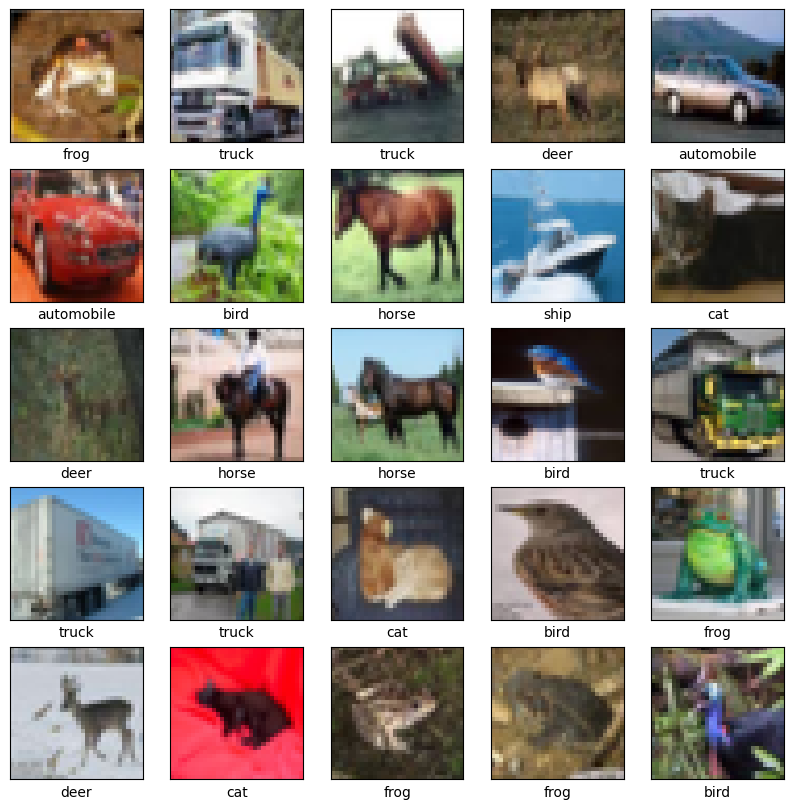

In [30]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [31]:
print('x_train, y_train shapes:', x_train.shape, y_train.shape)
print('x_test, y_test shapes:', x_test.shape, y_test.shape)

x_train, y_train shapes: (50000, 32, 32, 3) (50000,)
x_test, y_test shapes: (10000, 32, 32, 3) (10000,)


In [32]:
# Normalizar las imágenes usando Rescaling
rescaling = tf.keras.layers.Rescaling(1./255)
x_train = rescaling(x_train)
x_test = rescaling(x_test)

<a name='2.1'></a>
## Cuestión 1: Cree una red convolucional con la API funcional con al menos dos capas convolucionales y al menos dos capas de pooling. Debe obtener un `Test accuracy > 0.68`

In [58]:
inputs = tf.keras.Input(shape=(32, 32, 3), name='input')

# Convolucional + pooling layers
x = layers.Conv2D(72, 3, activation='relu', padding='same')(inputs)
x = layers.MaxPooling2D()(x)

x = layers.Conv2D(144, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D()(x)

# Flattening
x = layers.Flatten()(x)

# Fully-connected layers with dropout
x = layers.Dense(288, activation='relu')(x)
x = layers.Dropout(0.45)(x)
x = layers.Dense(144, activation='relu')(x)
x = layers.Dropout(0.35)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [59]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [60]:
history = model.fit(x_train, y_train, epochs=25, batch_size=100,
                    validation_split=0.15)

#Modifique el batch_size puesto que mas pequeño mas tarda el entrenamiento y mi computadora dejaba de funcionar a partir de un momento

Epoch 1/25
425/425 ━━━━━━━━━━━━━━━━━━━━ 29s 67ms/step - accuracy: 0.2719 - loss: 1.9425 - val_accuracy: 0.5244 - val_loss: 1.3346
Epoch 2/25
425/425 ━━━━━━━━━━━━━━━━━━━━ 29s 69ms/step - accuracy: 0.5004 - loss: 1.3840 - val_accuracy: 0.5829 - val_loss: 1.1623
Epoch 3/25
425/425 ━━━━━━━━━━━━━━━━━━━━ 30s 70ms/step - accuracy: 0.5720 - loss: 1.2011 - val_accuracy: 0.6409 - val_loss: 1.0264
Epoch 4/25
425/425 ━━━━━━━━━━━━━━━━━━━━ 33s 77ms/step - accuracy: 0.6189 - loss: 1.0822 - val_accuracy: 0.6632 - val_loss: 0.9711
Epoch 5/25
425/425 ━━━━━━━━━━━━━━━━━━━━ 30s 70ms/step - accuracy: 0.6552 - loss: 0.9830 - val_accuracy: 0.6817 - val_loss: 0.9125
Epoch 6/25
425/425 ━━━━━━━━━━━━━━━━━━━━ 31s 73ms/step - accuracy: 0.6772 - loss: 0.9147 - val_accuracy: 0.6853 - val_loss: 0.8937
Epoch 7/25
425/425 ━━━━━━━━━━━━━━━━━━━━ 29s 67ms/step - accuracy: 0.6997 - loss: 0.8560 - val_accuracy: 0.6901 - val_loss: 0.8867
Epoch 8/25
425/425 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 0.7175 - loss: 0.8015 - 

In [61]:
results = model.evaluate(x_test, y_test, verbose=0, batch_size=1000)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 1.0985196828842163
Test Accuracy: 0.6998000144958496


<a name='2.2'></a>
## Cuestión 2: Cree el mismo  modelo de manera secuencial. No es necesario compilar ni entrenar el modelo

In [62]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(32, 32, 3), name='input'),
    
    # Convolucional + pooling layers
    layers.Conv2D(72, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(144, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    
    # Flattening
    layers.Flatten(),
    
    # Fully-connected layers with dropout
    layers.Dense(288, activation='relu'),
    layers.Dropout(0.45),
    layers.Dense(144, activation='relu'),
    layers.Dropout(0.35),
    layers.Dense(10, activation='softmax')
])

<a name='2.3'></a>
## Cuestión 3: Si tenenemos una  una imagen de entrada de 300 x 300 a color (RGB) y queremos usar una red densa. Si la primera capa oculta tiene 100 neuronas, ¿Cuántos parámetros tendrá esa capa (sin incluir el bias) ?


Imagen RGB de 300 x 300: 90,000 píxeles  

Cada píxel tiene 3 canales (R, G, B), es decir, 90,000 x 3 = 270,000 valores  

Como cada neurona de la capa oculta está conectada a todas las entradas, si la primera capa oculta tiene 100 neuronas, entonces el número de parámetros (sin incluir el bias) es:  

270,000 × 100 = 27,000,000 parámetros

<a name='2.4'></a>
## Cuestión 4   Ponga  las verdaderas ventajas de las redes convolucionales respecto a las densas

**a)** Reducen el número total de parámetros, reduciendo así el overfitting.

**b)** Permiten utilizar una misma 'función'  en varias localizaciones de la imagen de entrada, en lugar de aprender una función diferente para cada pixel.

**c)** Permiten el uso del transfer learning.

**d)** Generalmente son menos profundas, lo que facilita su entrenamiento.



a) Reducen el número total de parámetros, reduciendo así el overfitting.   
b) Permiten utilizar una misma 'función' en varias localizaciones de la imagen de entrada, en lugar de aprender una función diferente para cada pixel.  
c) Permiten el uso del transfer learning.  

<a name='2.5'></a>
## Cuestión 5: Para el procesamiento de series temporales las redes convolucionales no son efectivas, habrá que usar redes recurrentes.

- **Verdadero** 
- **Falso** 

Falso: se pueden usar tambien para series temporales, incluso combinando capas convulucionales con capas de otro tipo puede ayudar a tener un buen modelo.